In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pingouin

In [2]:
df = pd.read_csv(r'C:\Users\User\Documents\Davi\Python\Dados\Kaggle\Student performance prediction\exams.csv')
df.columns = ['gender','race','par_education','lunch_type','prep_course','math_score','read_score','wrt_score']
display(df.head(5))
display(df.isna().sum())

,gender,race,par_education,lunch_type,prep_course,math_score,read_score,wrt_score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


gender           0
race             0
par_education    0
lunch_type       0
prep_course      0
math_score       0
read_score       0
wrt_score        0
dtype: int64

### 1 - Do the categories affects the scores? How?
### 2 - Are the categories independent? Or are they associated? If yes, how they affect each other?

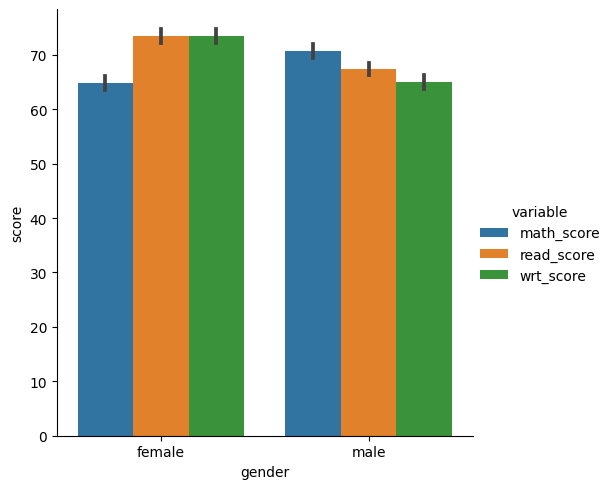

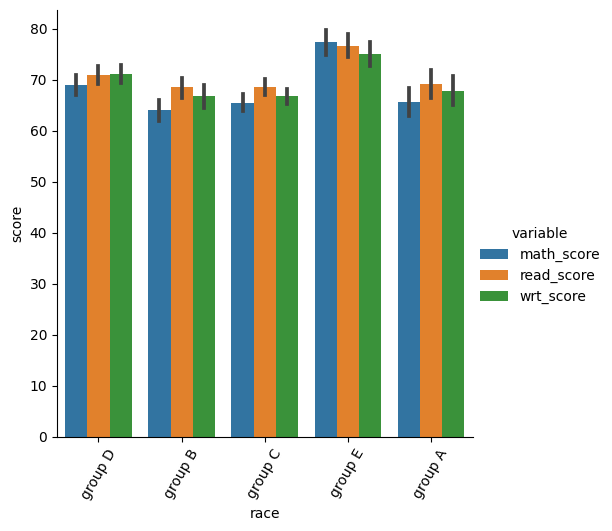

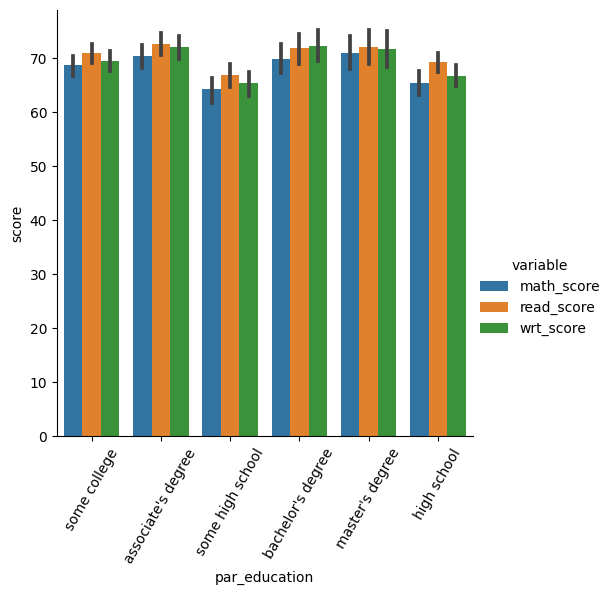

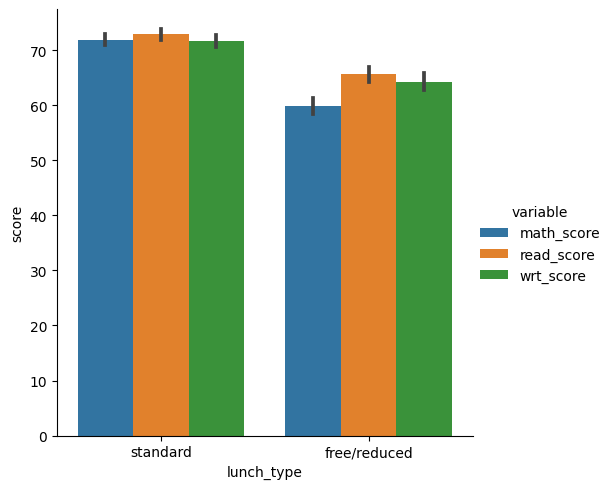

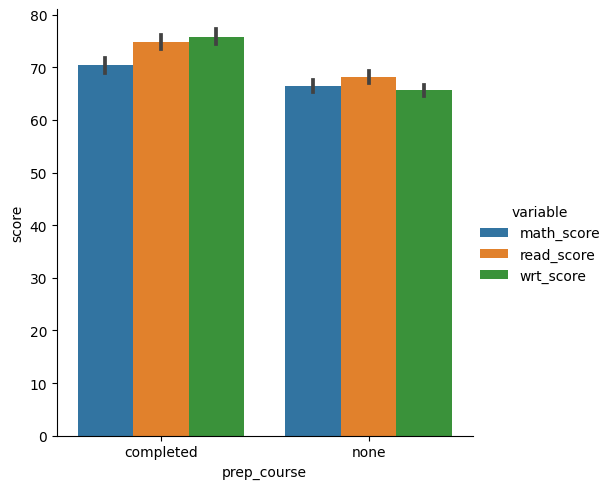

In [3]:
# test the averages for every category. If there is some evidence for dependency, analyse which hypotheis test fits the 
# best and execute the test

df_melted = df.melt(id_vars=['gender','race','par_education','lunch_type','prep_course'])

sns.catplot(data=df_melted,x='gender',y='value',hue='variable',kind='bar')
plt.ylabel('score')
plt.show()

sns.catplot(data=df_melted,x='race',y='value',hue='variable',kind='bar')
plt.xticks(rotation=60)
plt.ylabel('score')
plt.show()

sns.catplot(data=df_melted,x='par_education',y='value',hue='variable',kind='bar')
plt.xticks(rotation=60)
plt.ylabel('score')
plt.show()

sns.catplot(data=df_melted,x='lunch_type',y='value',hue='variable',kind='bar')
plt.ylabel('score')
plt.show()

sns.catplot(data=df_melted,x='prep_course',y='value',hue='variable',kind='bar')
plt.ylabel('score')
plt.show()

    With the averages and plots displayed above, we have the following insights:
    - Male students have higher scores in math but lower scores in reading and writing compared to female students
    - Race groups show substantial differences in scores
    - Parent's education influence in the scores
    - Students that need financial assistance for lunch presented lower scores
    - Students that completed the preparation course presented higher grades.
    
    An ANOVA test seems suitable to confirm the differences inside each group.
    

In [24]:
alpha = 0.01
categories = ['gender','race','par_education','lunch_type','prep_course']
scores = ['math_score','read_score','wrt_score']

cat = []
sco = []
anova_res = []
for category in categories:
    for score in scores:
        anova = pingouin.anova(data=df,dv=score,between=category)
        cat.append(category)
        sco.append(score)
        anova_res.append(anova.loc[0,'p-unc'])
       
results = pd.DataFrame({
    'category':cat,
    'score':sco,
    'anova_res':anova_res
})
results['null_h0'] = np.where(results['anova_res'] < alpha,'Rejected','Not rejected')
display(results)

,category,score,anova_res,null_h0
0,gender,math_score,4.084058e-10,Rejected
1,gender,read_score,5.338996e-12,Rejected
2,gender,wrt_score,1.068413e-19,Rejected
3,race,math_score,6.787458e-17,Rejected
4,race,read_score,1.137547e-07,Rejected
5,race,wrt_score,3.542316e-08,Rejected
6,par_education,math_score,5.162405e-05,Rejected
7,par_education,read_score,1.393919e-03,Rejected
8,par_education,wrt_score,6.395310e-06,Rejected
9,lunch_type,math_score,2.903658e-34,Rejected


    Answering the n° 1 question, the results presented in the dataframe above confirms that the all the scores (math, reading and writing) are significantly affected by the categories.  

    Additional question - If the score difference for students that need financial assistance and for those who do not is real , taking a preparation course can elevate their score to the level of late?    
   

In [26]:
df_pivot1 = df.pivot_table(columns='lunch_type',index='prep_course',values='math_score',aggfunc=['mean','std','count'])
df_pivot2 = df.pivot_table(columns='lunch_type',index='prep_course',values='read_score',aggfunc=['mean','std','count'])
df_pivot3 = df.pivot_table(columns='lunch_type',index='prep_course',values='wrt_score',aggfunc=['mean','std','count'])
display(df_pivot1)
display(df_pivot2)
display(df_pivot3)

mean                     std                   count   
lunch_type  free/reduced   standard free/reduced   standard free/reduced   
prep_course                                                                
completed      61.876812  76.000000    12.503111  13.280097          138  \
none           58.549505  70.017621    14.759769  14.310176          202   

                      
lunch_type  standard  
prep_course           
completed        206  
none             454

mean                     std                   count   
lunch_type  free/reduced   standard free/reduced   standard free/reduced   
prep_course                                                                
completed      69.536232  78.203883    12.337800  12.395797          138  \
none           62.980198  70.383260    13.201824  13.911206          202   

                      
lunch_type  standard  
prep_course           
completed        206  
none             454

mean                     std                   count   
lunch_type  free/reduced   standard free/reduced   standard free/reduced   
prep_course                                                                
completed      70.144928  79.601942    12.893472  12.434288          138  \
none           60.198020  68.066079    14.077624  14.242152          202   

                      
lunch_type  standard  
prep_course           
completed        206  
none             454

    Statements:
    - In math, a preparation course increased the student's scores on more than 3 and 6 points on average to the student's categories that received free/reduced meal and those who paid the standard cost, respectively. Unfortunately, even with some improvements, the scores from the financial assistance adepts did not reach those who don't need it.
    - In the reading metric, the preparation course increased 7 - 8 points on average in each the category. The scores from the financial assistance adepts who took the preparation course almost reached the average of those students who do not use both financial assistance and preparation course. Maybe a hypothesis test is suitable to confirm.
    - In the writing metric, the preparation course increased 10 and 11 points, respectively, for the group that needed the financial aid and the one that didn't. Surprisingly, the scores from the aid group that took the preparation course surpassed the scores of the ones that didn't need the aid and didn't take the preparation course.

    After the hypothesis test above, we can investigate associations between the categories using the chi2 independence
    test. Ex: is the parent's education associated to the occurrence of the financial assistance for lunch? Is the 
    parent's education associated to the race groups? Is the student's race associated to the need of financial 
    assistance?

par_education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
race,,,,,,
group A,0.265823,0.050633,0.253165,0.050633,0.189873,0.189873
group B,0.207071,0.136364,0.217172,0.070707,0.202020,0.166667
group C,0.182663,0.108359,0.229102,0.077399,0.244582,0.157895
group D,0.229572,0.097276,0.178988,0.077821,0.214008,0.202335
group E,0.167832,0.097902,0.223776,0.083916,0.244755,0.181818


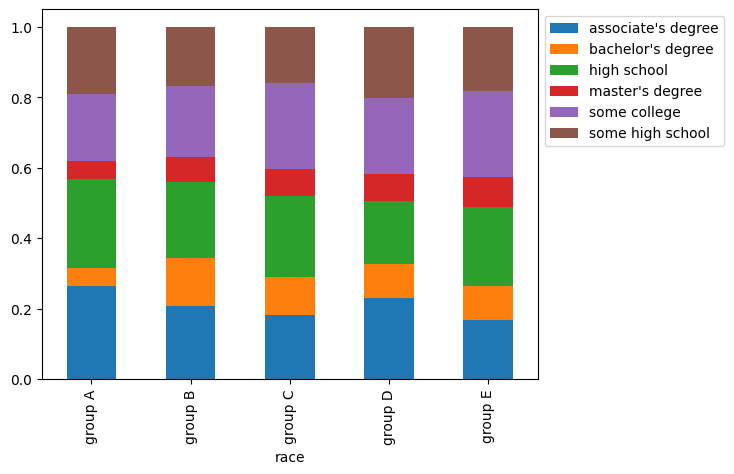

C:\Users\User\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


test        pearson
lambda          1.0
chi2      15.244868
dof            20.0
pval       0.762229
cramer     0.061735
power      0.151251
Name: 0, dtype: object

lunch_type,free/reduced,standard
race,,
group A,0.265823,0.734177
group B,0.378788,0.621212
group C,0.349845,0.650155
group D,0.330739,0.669261
group E,0.321678,0.678322


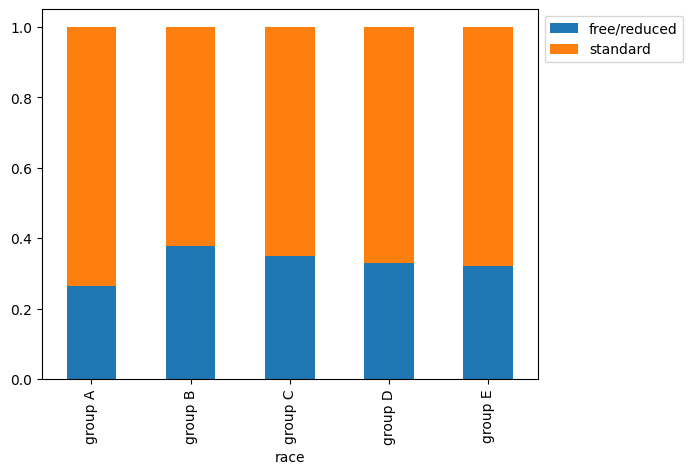

test       pearson
lambda         1.0
chi2      3.716223
dof            4.0
pval      0.445771
cramer    0.060961
power     0.298392
Name: 0, dtype: object

prep_course,completed,none
race,,
group A,0.392405,0.607595
group B,0.333333,0.666667
group C,0.312693,0.687307
group D,0.377432,0.622568
group E,0.342657,0.657343


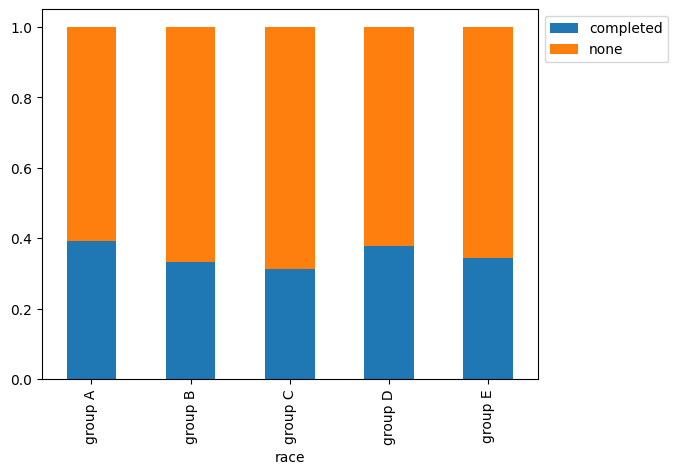

test       pearson
lambda         1.0
chi2      3.596963
dof            4.0
pval      0.463289
cramer    0.059975
power     0.289299
Name: 0, dtype: object

prep_course,completed,none
race,,
group A,0.392405,0.607595
group B,0.333333,0.666667
group C,0.312693,0.687307
group D,0.377432,0.622568
group E,0.342657,0.657343


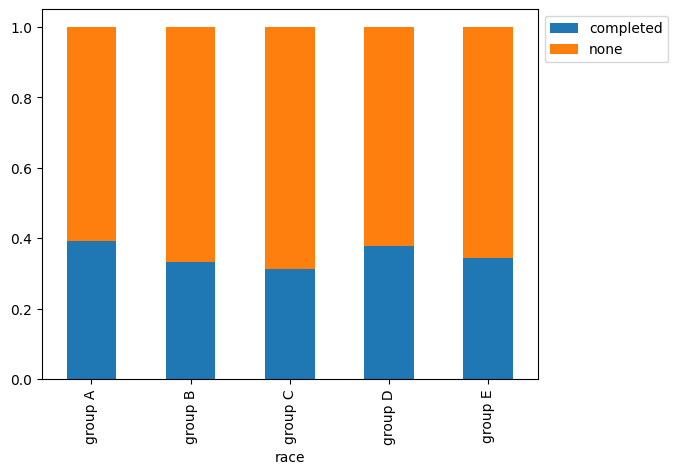

test       pearson
lambda         1.0
chi2      3.596963
dof            4.0
pval      0.463289
cramer    0.059975
power     0.289299
Name: 0, dtype: object

lunch_type,free/reduced,standard
par_education,,
associate's degree,0.352941,0.647059
bachelor's degree,0.352381,0.647619
high school,0.367442,0.632558
master's degree,0.333333,0.666667
some college,0.330357,0.669643
some high school,0.299435,0.700565


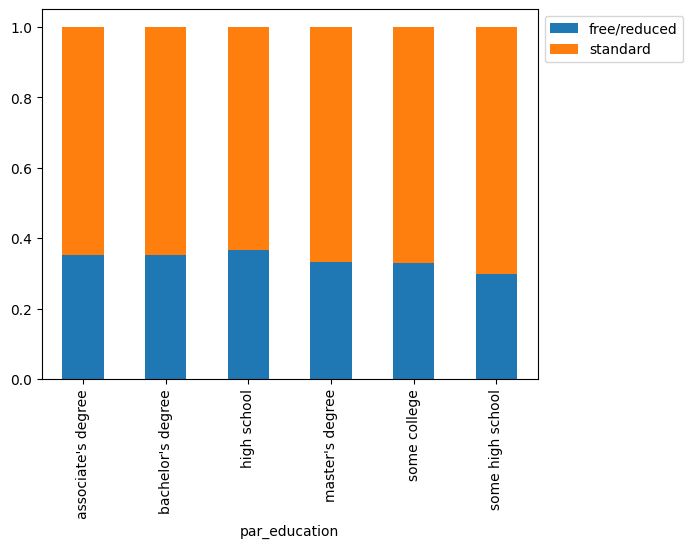

test       pearson
lambda         1.0
chi2      2.351093
dof            5.0
pval      0.798734
cramer    0.048488
power     0.179291
Name: 0, dtype: object

prep_course,completed,none
par_education,,
associate's degree,0.352941,0.647059
bachelor's degree,0.380952,0.619048
high school,0.334884,0.665116
master's degree,0.280000,0.720000
some college,0.348214,0.651786
some high school,0.344633,0.655367


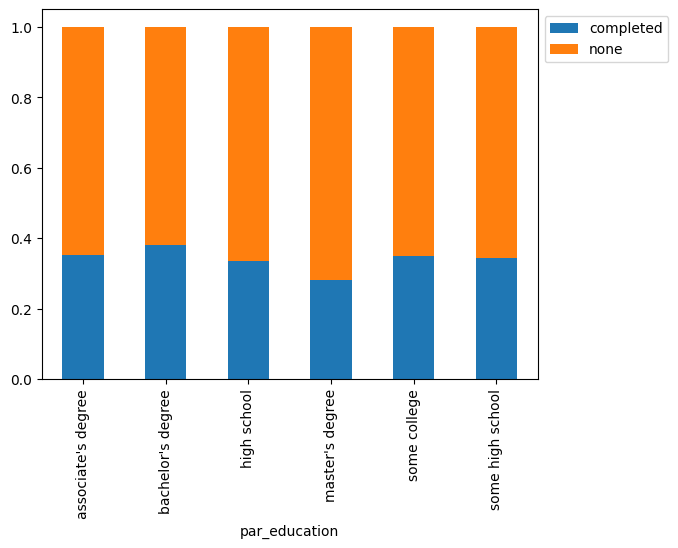

test       pearson
lambda         1.0
chi2      2.166057
dof            5.0
pval      0.825723
cramer    0.046541
power     0.167441
Name: 0, dtype: object

In [92]:
educ_race = df.groupby('race')['par_education'].value_counts(normalize=True).unstack()
display(educ_race)
educ_race.plot(kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.show()
stats = pingouin.chi2_independence(data=df,x='par_education',y='race')[2]
display(stats.iloc[0])

lunch_race = df.groupby('race')['lunch_type'].value_counts(normalize=True).unstack()
display(lunch_race)
lunch_race.plot(kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.show()
stats = pingouin.chi2_independence(data=df,x='lunch_type',y='race')[2]
display(stats.iloc[0])

prep_race = df.groupby('race')['prep_course'].value_counts(normalize=True).unstack()
display(prep_race)
prep_race.plot(kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.show()
stats = pingouin.chi2_independence(data=df,x='prep_course',y='race')[2]
display(stats.iloc[0])

prep_race = df.groupby('race')['prep_course'].value_counts(normalize=True).unstack()
display(prep_race)
prep_race.plot(kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.show()
stats = pingouin.chi2_independence(data=df,x='prep_course',y='race')[2]
display(stats.iloc[0])

educ_lunch = df.groupby('par_education')['lunch_type'].value_counts(normalize=True).unstack()
display(educ_lunch)
educ_lunch.plot(kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.show()
stats = pingouin.chi2_independence(data=df,x='par_education',y='lunch_type')[2]
display(stats.iloc[0])

educ_prep = df.groupby('par_education')['prep_course'].value_counts(normalize=True).unstack()
display(educ_prep)
educ_prep.plot(kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.show()
stats = pingouin.chi2_independence(data=df,x='par_education',y='prep_course')[2]
display(stats.iloc[0])

    After the plots and chi2 independence tests performed above, we can conclude, based on the high value of p for every category comparison, that these categorical groups are independent. 